## About 
This notebook has code that was used in analysing data of the Lok Sabha elections.

## Getting Started
To use this notebook directly, you need to clone the repository available <a href="https://github.com/vasanimit9/Lok-Sabha-Elections-pickled-dataset">here</a> in the same directory and name it ```data```.

You can use the following command for that:
```
$ git clone https://github.com/vasanimit9/Lok-Sabha-Elections-pickled-dataset data
```

In [1]:
import sys
from data import classes
sys.modules['classes'] = classes
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

## Unpickling the data

In [2]:
lse = {}
for i in os.listdir('data'):
    if i.split(".")[-1] == "dat":
        f = open(os.path.join('data', i), 'rb')
        unpickled_object = pickle.load(f)
        f.close()
        lse[unpickled_object.year] = unpickled_object

## Percentage margins across elections

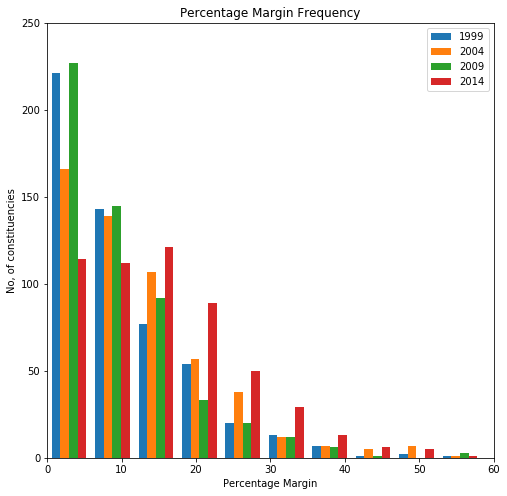

In [3]:
margins = {}
for i in lse:
    margins[i] = []
    for j in lse[i].constituencies:
        try:
            margins[i].append(j.winningMargin(percentage = True))
        except:
            continue
plt.figure(figsize = (8,8))
plt.hist(
    [margins[1999], margins[2004], margins[2009], margins[2014]], 
    bins = 12, 
    label=['1999', '2004', '2009', '2014']
)
plt.xlim([0, 60])
plt.ylim([0, 250])
plt.xlabel("Percentage Margin")
plt.ylabel("No, of constituencies")
plt.title("Percentage Margin Frequency")
plt.legend(loc="best")
plt.show()

## Absolute vote margins across elections

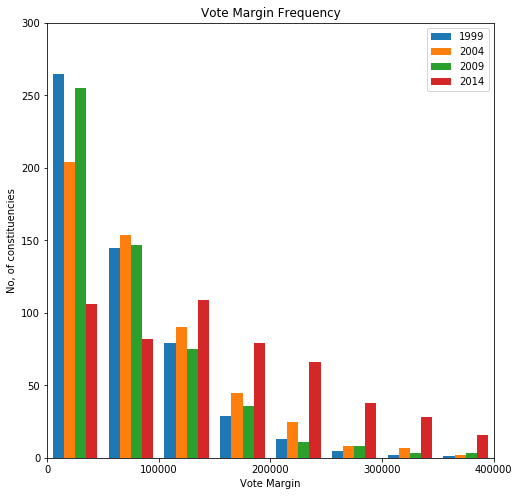

In [4]:
margins = {}
for i in lse:
    margins[i] = []
    for j in lse[i].constituencies:
        try:
            margins[i].append(j.winningMargin(percentage = False))
        except:
            continue
plt.figure(figsize = (8,8))
plt.hist([margins[1999], margins[2004], margins[2009], margins[2014]],\
         bins = range(0, 650000, 50000) , label=['1999', '2004', '2009', '2014'])
plt.xlim([0, 400000])
plt.ylim([0, 300])
plt.xlabel("Vote Margin")
plt.ylabel("No, of constituencies")
plt.xticks([0, 100000, 200000, 300000, 400000])
plt.title("Vote Margin Frequency")
plt.legend(loc="best")
plt.show()

## Constituencies support frequency

In [5]:
output = {}
outputu = {}
outputn = {}
for i in lse[2014].constituencies:
    output[i.name] = {}
    outputu[i.name] = {}
    outputn[i.name] = {}
    for j in lse:
        flag = True
        remove = False
        for k in lse[j].constituencies:
            if k.name.strip().lower() == i.name.strip().lower():
                output[i.name][j] = 0
                outputu[i.name][j] = 0
                outputn[i.name][j] = 0
                if len(k.candidates) > 0:
                    if k.candidates[0].alliance == lse[j].winner():
                        output[i.name][j] = 1
                    try:
                        if k.candidates[0].alliance.upper() == "UPA":
                            outputu[i.name][j] = 1
                        if k.candidates[0].alliance.upper() == "NDA":
                            outputn[i.name][j] = 1
                    except:
                        pass
                else:
                    output[i.name][j] = 0
                    outputu[i.name][j] = 0
                    outputn[i.name][j] = 0
                flag = False
        if flag:
            remove = True
            break
    if remove:
        output.pop(i.name)

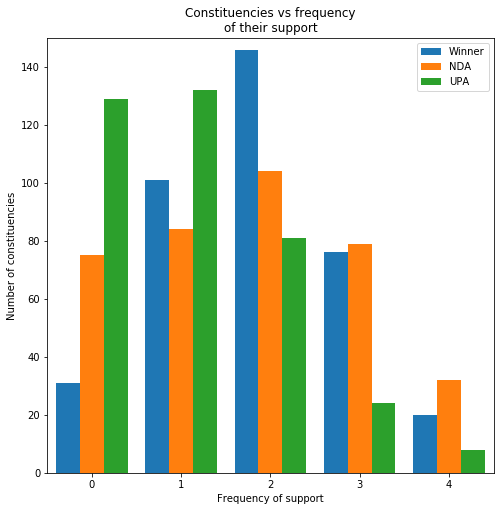

In [6]:
swing = [0, 0, 0, 0, 0]
upa = [0, 0, 0, 0, 0]
nda = [0, 0, 0, 0, 0]
for i in output:
    ctr = 0
    ctru = 0
    ctrn = 0
    for j in output[i]:
        ctr += output[i][j]
        ctru += outputu[i][j]
        ctrn += outputn[i][j]
    swing[ctr] += 1
    upa[ctru] += 1
    nda[ctrn] += 1
swingHist = []
for i in range(5):
    for j in range(swing[i]):
        swingHist.append(i)
ndaHist = []
for i in range(5):
    for j in range(nda[i]):
        ndaHist.append(i)
upaHist = []
for i in range(5):
    for j in range(upa[i]):
        upaHist.append(i)
plt.figure(figsize = (8, 8))
plt.hist(
    [swingHist, ndaHist, upaHist],    
    bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5],
    label=['Winner', 'NDA', 'UPA']
)
plt.xlim([-0.5, 4.5])
plt.ylim([0, 150])
plt.xlabel("Frequency of support")
plt.ylabel("Number of constituencies")
plt.title("Constituencies vs frequency\nof their support")
plt.xticks([0, 1, 2, 3, 4])
plt.legend(loc='best')
plt.show()

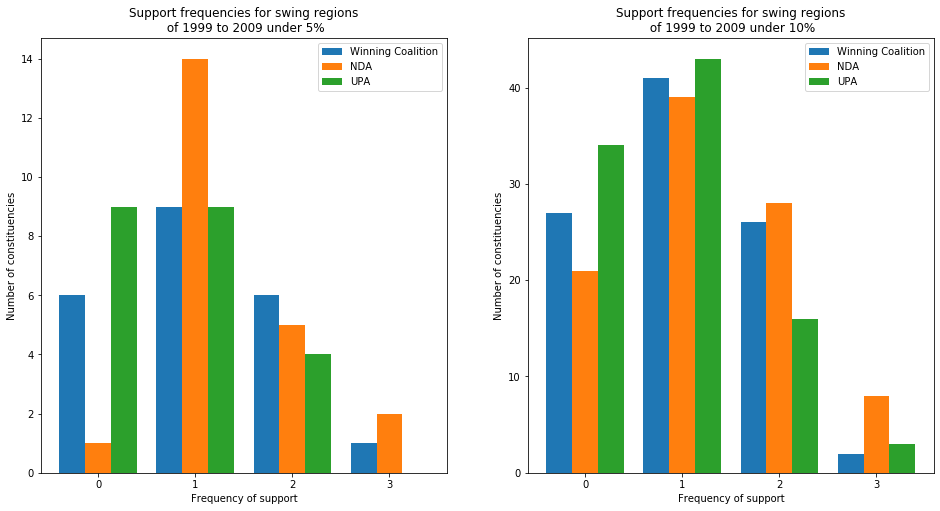

In [7]:
swingRegions = {}
nda_cons = 0
nda = []
plt.figure(figsize = (16, 8))
ctr = 1
for margin in [5, 10]:
    swingRegions[margin] = []
    for i in lse[1999].constituencies:
        swingRegions[margin].append(i.name)
    for year in 1999, 2004, 2009:
        for i in swingRegions[margin]:
            remove = True
            for j in lse[year].constituencies:
                if i == j.name:
                    remove = False
                    break
            if remove:
                swingRegions[margin].pop(swingRegions[margin].index(i))
        for cons in lse[year].constituencies:
            remove = True
            if cons.name in swingRegions[margin] and len(cons.candidates) > 0:
                if cons.winningMargin(True) <= margin:
                    remove = False
            try:
                if remove:
                    swingRegions[margin].pop(swingRegions[margin].index(cons.name))
            except:
                continue
    margin14 = []
    nda_cons = 0
    for i in lse[2014].constituencies:
        if i.name in swingRegions[margin]:
            nda_cons += int(i.winner().alliance == "NDA")
            margin14.append(i.winningMargin(True))
#     plt.subplot(2, 2, ctr)
#     ctr += 1
#     plt.hist(margin14, bins=range(0, 110, 5))
#     plt.title("Percentage Margin in 2014 for prior\nswing regions under " + str(margin) + "% votes")
#     plt.xlabel("Percentage margin")
#     plt.ylabel("Number of constituencies")
#     plt.xlim([0, 40])
    swingFreqs = {}
    for i in swingRegions[margin]:
        swingFreqs[i] = 0
    for i in swingRegions[margin]:
        for j in [1999, 2004, 2009]:
            for cons in lse[j].constituencies:
                if cons.name == i:
                    try:
                        if cons.winner().alliance == lse[j].winner_alliance:
                            swingFreqs[i] += 1
                            break
                    except:
                        continue
    swings1 = [0, 0, 0, 0, 0]
    for i in swingFreqs:
        swings1[swingFreqs[i]] += 1
    swingFreqs = {}
    for i in swingRegions[margin]:
        swingFreqs[i] = 0
    for i in swingRegions[margin]:
        for j in [1999, 2004, 2009]:
            for cons in lse[j].constituencies:
                if cons.name == i:
                    try:
                        if cons.winner().alliance == "NDA":
                            swingFreqs[i] += 1
                            break
                    except:
                        continue
    swings2 = [0, 0, 0, 0, 0]
    for i in swingFreqs:
        swings2[swingFreqs[i]] += 1
    swingFreqs = {}
    for i in swingRegions[margin]:
        swingFreqs[i] = 0
    for i in swingRegions[margin]:
        for j in [1999, 2004, 2009]:
            for cons in lse[j].constituencies:
                if cons.name == i:
                    try:
                        if cons.winner().alliance == "UPA":
                            swingFreqs[i] += 1
                            break
                    except:
                        continue
    swings3 = [0, 0, 0, 0, 0]
    for i in swingFreqs:
        swings3[swingFreqs[i]] += 1
    output = [[], [], []]
    for i in range(5):
        output[0] += [i]*swings1[i]
    for i in range(5):
        output[1] += [i]*swings2[i]
    for i in range(5):
        output[2] += [i]*swings3[i]
    plt.subplot(1, 2, ctr)
    ctr += 1
    plt.hist(output, bins=[-0.5, 0.5, 1.5, 2.5, 3.5],\
             label=["Winning Coalition", "NDA", "UPA"], histtype="bar")
    plt.xlabel("Frequency of support")
    plt.ylabel("Number of constituencies")
    plt.title("Support frequencies for swing regions\n of 1999 to 2009 under " + str(margin) + "%")
    plt.legend(loc = "best")
    plt.xticks([0, 1, 2, 3], labels = [0, 1, 2, 3])
    nda.append(output[1])

Margin: 5%
Number of prior swing regions: 22
Number of prior swing regions supporting NDA: 15
Number of prior swing regions supporting NDA with higher margin: 14
Margin: 10%
Number of prior swing regions: 96
Number of prior swing regions supporting NDA: 68
Number of prior swing regions supporting NDA with higher margin: 52


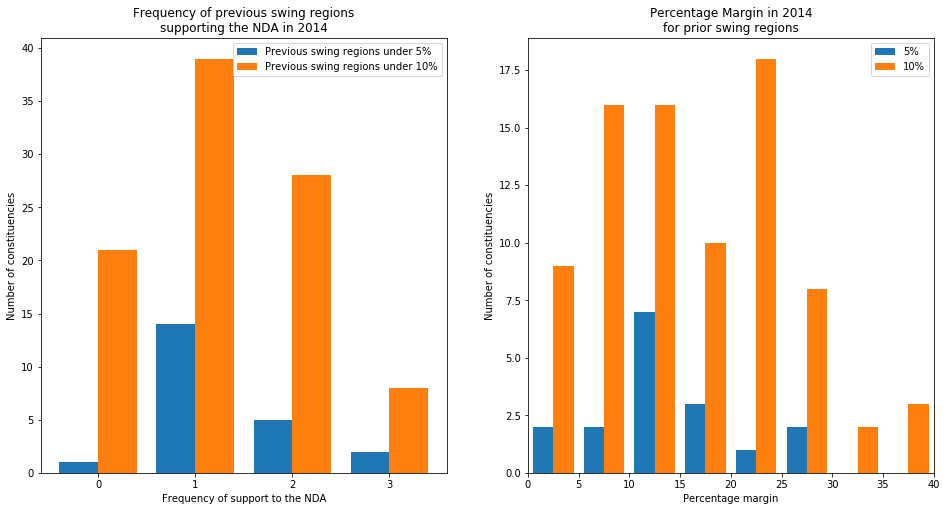

In [8]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.hist(nda, bins=[-0.5, 0.5, 1.5, 2.5, 3.5],\
        label=["Previous swing regions under 5%", "Previous swing regions under 10%"], histtype="bar")
plt.xlabel("Frequency of support to the NDA")
plt.ylabel("Number of constituencies")
plt.title("Frequency of previous swing regions\nsupporting the NDA in 2014")
plt.legend(loc="best")
plt.xticks([0, 1, 2, 3], labels = [0, 1, 2, 3])
swingRegions = {}
nda_cons = 0
marginssss = []
nda = []
for margin in [5, 10]:
    print("Margin: " + str(margin) + "%")
    nda_high_margin_cons = 0
    swingRegions[margin] = []
    for i in lse[1999].constituencies:
        swingRegions[margin].append(i.name)
    for year in 1999, 2004, 2009:
        for i in swingRegions[margin]:
            remove = True
            for j in lse[year].constituencies:
                if i == j.name:
                    remove = False
                    break
            if remove:
                swingRegions[margin].pop(swingRegions[margin].index(i))
        for cons in lse[year].constituencies:
            remove = True
            if cons.name in swingRegions[margin] and len(cons.candidates) > 0:
                if cons.winningMargin(True) <= margin:
                    remove = False
            try:
                if remove:
                    swingRegions[margin].pop(swingRegions[margin].index(cons.name))
            except:
                continue
    print("Number of prior swing regions:", len(swingRegions[margin]))
    margin14 = []
    nda_cons = 0
    for i in lse[2014].constituencies:
        if i.name in swingRegions[margin]:
            nda_cons += int(i.winner().alliance == "NDA")
            margin14.append(i.winningMargin(True))
            if i.winningMargin(True) > margin and i.winner().alliance == "NDA":
                nda_high_margin_cons += 1
    print("Number of prior swing regions supporting NDA:", nda_cons)
    print("Number of prior swing regions supporting NDA with higher margin:", nda_high_margin_cons)
    marginssss.append(margin14)
    
plt.subplot(1, 2, 2)
plt.hist(marginssss, bins=range(0, 45, 5),\
         label=["5%", "10%"], histtype="bar")
plt.title("Percentage Margin in 2014\nfor prior swing regions")
plt.xlabel("Percentage margin")
plt.ylabel("Number of constituencies")
plt.xlim([0, 40])
plt.legend(loc='best')
plt.show()